<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Data-Cleaning" data-toc-modified-id="Data-Cleaning-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Data Cleaning</a></span></li><li><span><a href="#Train/Test-Split" data-toc-modified-id="Train/Test-Split-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Train/Test Split</a></span></li><li><span><a href="#Create-Inputs" data-toc-modified-id="Create-Inputs-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Create Inputs</a></span></li><li><span><a href="#Create-Y-Variables" data-toc-modified-id="Create-Y-Variables-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Create Y Variables</a></span></li><li><span><a href="#Fit-Model" data-toc-modified-id="Fit-Model-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Fit Model</a></span></li><li><span><a href="#Model-Summaries" data-toc-modified-id="Model-Summaries-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Model Summaries</a></span></li></ul></div>

In [109]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import os
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.utils import resample
import keras_preprocessing as k
import keras.layers as kl
import keras.optimizers as ko
import keras.callbacks as kc
import keras.backend as K
import keras.initializers as ki
from keras.utils import Sequence
from keras.models import Model
from keras.models import Sequential

In [2]:
df_log = pd.read_csv("/Users/aescot2/Documents/SPRING 2020/Data Science 2/Project/Data/data 2/training_set/log_mini.csv")

df_track = pd.read_csv("/Users/aescot2/Documents/SPRING 2020/Data Science 2/Project/Data/data 2/track_features/tf_mini.csv")

# Data Cleaning

In [20]:
df_log.shape

(167880, 21)

In [21]:
df_track.shape

(50704, 30)

In [22]:
df_log.columns

Index(['session_id', 'session_position', 'session_length', 'track_id_clean',
       'skip_1', 'skip_2', 'skip_3', 'not_skipped', 'context_switch',
       'no_pause_before_play', 'short_pause_before_play',
       'long_pause_before_play', 'hist_user_behavior_n_seekfwd',
       'hist_user_behavior_n_seekback', 'hist_user_behavior_is_shuffle',
       'hour_of_day', 'date', 'premium', 'context_type',
       'hist_user_behavior_reason_start', 'hist_user_behavior_reason_end'],
      dtype='object')

In [23]:
df_log.dtypes

session_id                         object
session_position                    int64
session_length                      int64
track_id_clean                     object
skip_1                               bool
skip_2                               bool
skip_3                               bool
not_skipped                          bool
context_switch                      int64
no_pause_before_play                int64
short_pause_before_play             int64
long_pause_before_play              int64
hist_user_behavior_n_seekfwd        int64
hist_user_behavior_n_seekback       int64
hist_user_behavior_is_shuffle        bool
hour_of_day                         int64
date                               object
premium                              bool
context_type                       object
hist_user_behavior_reason_start    object
hist_user_behavior_reason_end      object
dtype: object

In [24]:
df_track.rename(columns = {'track_id':'track_id_clean'}, inplace = True) 

In [25]:
df_track.columns

Index(['track_id_clean', 'duration', 'release_year', 'us_popularity_estimate',
       'acousticness', 'beat_strength', 'bounciness', 'danceability',
       'dyn_range_mean', 'energy', 'flatness', 'instrumentalness', 'key',
       'liveness', 'loudness', 'mechanism', 'mode', 'organism', 'speechiness',
       'tempo', 'time_signature', 'valence', 'acoustic_vector_0',
       'acoustic_vector_1', 'acoustic_vector_2', 'acoustic_vector_3',
       'acoustic_vector_4', 'acoustic_vector_5', 'acoustic_vector_6',
       'acoustic_vector_7'],
      dtype='object')

In [26]:
(df_log[['not_skipped']]==False).sum()

not_skipped    111996
dtype: int64

In [27]:
(df_log[['not_skipped']]==True).sum()

not_skipped    55884
dtype: int64

In [28]:
df_track.columns

Index(['track_id_clean', 'duration', 'release_year', 'us_popularity_estimate',
       'acousticness', 'beat_strength', 'bounciness', 'danceability',
       'dyn_range_mean', 'energy', 'flatness', 'instrumentalness', 'key',
       'liveness', 'loudness', 'mechanism', 'mode', 'organism', 'speechiness',
       'tempo', 'time_signature', 'valence', 'acoustic_vector_0',
       'acoustic_vector_1', 'acoustic_vector_2', 'acoustic_vector_3',
       'acoustic_vector_4', 'acoustic_vector_5', 'acoustic_vector_6',
       'acoustic_vector_7'],
      dtype='object')

In [29]:
df_track.dtypes

track_id_clean             object
duration                  float64
release_year                int64
us_popularity_estimate    float64
acousticness              float64
beat_strength             float64
bounciness                float64
danceability              float64
dyn_range_mean            float64
energy                    float64
flatness                  float64
instrumentalness          float64
key                         int64
liveness                  float64
loudness                  float64
mechanism                 float64
mode                       object
organism                  float64
speechiness               float64
tempo                     float64
time_signature              int64
valence                   float64
acoustic_vector_0         float64
acoustic_vector_1         float64
acoustic_vector_2         float64
acoustic_vector_3         float64
acoustic_vector_4         float64
acoustic_vector_5         float64
acoustic_vector_6         float64
acoustic_vecto

In [30]:
df_joined = df_log.merge(df_track,on ='track_id_clean') 

In [31]:
df_joined.shape

(167880, 50)

In [32]:
df_joined.isna().sum()

session_id                         0
session_position                   0
session_length                     0
track_id_clean                     0
skip_1                             0
skip_2                             0
skip_3                             0
not_skipped                        0
context_switch                     0
no_pause_before_play               0
short_pause_before_play            0
long_pause_before_play             0
hist_user_behavior_n_seekfwd       0
hist_user_behavior_n_seekback      0
hist_user_behavior_is_shuffle      0
hour_of_day                        0
date                               0
premium                            0
context_type                       0
hist_user_behavior_reason_start    0
hist_user_behavior_reason_end      0
duration                           0
release_year                       0
us_popularity_estimate             0
acousticness                       0
beat_strength                      0
bounciness                         0
d

In [33]:
df_joined.dtypes

session_id                          object
session_position                     int64
session_length                       int64
track_id_clean                      object
skip_1                                bool
skip_2                                bool
skip_3                                bool
not_skipped                           bool
context_switch                       int64
no_pause_before_play                 int64
short_pause_before_play              int64
long_pause_before_play               int64
hist_user_behavior_n_seekfwd         int64
hist_user_behavior_n_seekback        int64
hist_user_behavior_is_shuffle         bool
hour_of_day                          int64
date                                object
premium                               bool
context_type                        object
hist_user_behavior_reason_start     object
hist_user_behavior_reason_end       object
duration                           float64
release_year                         int64
us_populari

<b><font size="5">Categorical Columns</b></font>

In [35]:
df_joined.select_dtypes(include=['object']).columns

Index(['session_id', 'track_id_clean', 'date', 'context_type',
       'hist_user_behavior_reason_start', 'hist_user_behavior_reason_end',
       'mode'],
      dtype='object')

<b><font size="4">1. Session ID</b></font>

In [36]:
# Convert column into 'category' type
df_joined["session_id"]=df_joined["session_id"].astype('category')
# Create ordinal encoding
df_joined["session_id"] = df_joined["session_id"].cat.codes

<b><font size="4">2. Track ID</b></font>

In [37]:
# Convert column into 'category' type
df_joined["track_id_clean"]=df_joined["track_id_clean"].astype('category')
# Create ordinal encoding
df_joined["track_id_clean"] = df_joined["track_id_clean"].cat.codes

<b><font size="4">3. Context Type</b></font>

In [38]:
df_joined["context_type"].unique()

array(['editorial_playlist', 'user_collection', 'catalog', 'radio',
       'charts', 'personalized_playlist'], dtype=object)

In [39]:
# Convert column into 'category' type
df_joined["context_type"]=df_joined["context_type"].astype('category')
df_joined = pd.concat([df_joined,pd.get_dummies(df_joined['context_type'], prefix='context')],axis=1)
df_joined.drop(['context_type'],axis=1, inplace=True)

<b><font size="4">4. Reason Start</b></font>

In [40]:
df_joined["hist_user_behavior_reason_start"].unique()

array(['trackdone', 'fwdbtn', 'appload', 'playbtn', 'clickrow', 'backbtn',
       'remote', 'endplay', 'trackerror'], dtype=object)

In [41]:
# Convert column into 'category' type
df_joined["hist_user_behavior_reason_start"]=df_joined["hist_user_behavior_reason_start"].astype('category')
df_joined = pd.concat([df_joined,pd.get_dummies(df_joined['hist_user_behavior_reason_start'], prefix='start_user_behavior')],axis=1)
df_joined.drop(['hist_user_behavior_reason_start'],axis=1, inplace=True)

<b><font size="4">5. Reason End</b></font>

In [42]:
df_joined["hist_user_behavior_reason_end"].unique()

array(['trackdone', 'endplay', 'fwdbtn', 'backbtn', 'remote', 'logout',
       'clickrow'], dtype=object)

In [43]:
# Convert column into 'category' type
df_joined["hist_user_behavior_reason_end"]=df_joined["hist_user_behavior_reason_end"].astype('category')
df_joined = pd.concat([df_joined,pd.get_dummies(df_joined['hist_user_behavior_reason_end'], prefix='end_user_behavior')],axis=1)
df_joined.drop(['hist_user_behavior_reason_end'],axis=1, inplace=True)

<b><font size="4">6. Mode</b></font>

In [44]:
df_joined["mode"].unique()

array(['major', 'minor'], dtype=object)

In [45]:
# Convert column into 'category' type
df_joined["mode"]=df_joined["mode"].astype('category')
df_joined = pd.concat([df_joined,pd.get_dummies(df_joined['mode'], prefix='mode')],axis=1)
df_joined.drop(['mode'],axis=1, inplace=True)

In [46]:
# Drop the date column since we expanded it out
df_joined=df_joined.drop(columns=['date'])

<b><font size="5">Boolean Columns</b></font>

In [47]:
l=df_joined.select_dtypes(include=['bool']).columns
df_joined[l] = df_joined[l].astype(int)
df_joined.columns

Index(['session_id', 'session_position', 'session_length', 'track_id_clean',
       'skip_1', 'skip_2', 'skip_3', 'not_skipped', 'context_switch',
       'no_pause_before_play', 'short_pause_before_play',
       'long_pause_before_play', 'hist_user_behavior_n_seekfwd',
       'hist_user_behavior_n_seekback', 'hist_user_behavior_is_shuffle',
       'hour_of_day', 'premium', 'duration', 'release_year',
       'us_popularity_estimate', 'acousticness', 'beat_strength', 'bounciness',
       'danceability', 'dyn_range_mean', 'energy', 'flatness',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mechanism',
       'organism', 'speechiness', 'tempo', 'time_signature', 'valence',
       'acoustic_vector_0', 'acoustic_vector_1', 'acoustic_vector_2',
       'acoustic_vector_3', 'acoustic_vector_4', 'acoustic_vector_5',
       'acoustic_vector_6', 'acoustic_vector_7', 'context_catalog',
       'context_charts', 'context_editorial_playlist',
       'context_personalized_playlist', 'contex

# Train/Test Split 

In [51]:
# This function splits the session in half so that one half can be X value and half can be our Y value
def split_data(traindf):
    for_feats = traindf.loc[
        lambda x: x.session_position <= x.session_length-1
    ].copy()

    traindf = traindf.loc[
        lambda x: x.session_position >x.session_length-1
    ].sort_values(['session_id', 'session_position'])


    return (traindf.reset_index(drop=True),
            for_feats.reset_index(drop=True))

In [52]:
# We are going to use 80% of sessions to train and 20% to test
sample_ids = df_joined.session_id.drop_duplicates().sample(frac=0.2).tolist()

In [53]:
train_df, train_feats = split_data(
    df_joined
    .loc[lambda x: ~x.session_id.isin(sample_ids)]
    .sort_values(['session_id', 'session_position'])
    .reset_index(drop=True))

In [54]:
test_df, test_feats = split_data(
    df_joined
    .loc[lambda x: x.session_id.isin(sample_ids)]
    .sort_values(['session_id', 'session_position'])
    .reset_index(drop=True))

# Create Inputs

In [72]:
train_feats.columns

Index(['session_id', 'session_position', 'session_length', 'track_id_clean',
       'skip_1', 'skip_2', 'skip_3', 'not_skipped', 'context_switch',
       'no_pause_before_play', 'short_pause_before_play',
       'long_pause_before_play', 'hist_user_behavior_n_seekfwd',
       'hist_user_behavior_n_seekback', 'hist_user_behavior_is_shuffle',
       'hour_of_day', 'premium', 'duration', 'release_year',
       'us_popularity_estimate', 'acousticness', 'beat_strength', 'bounciness',
       'danceability', 'dyn_range_mean', 'energy', 'flatness',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mechanism',
       'organism', 'speechiness', 'tempo', 'time_signature', 'valence',
       'acoustic_vector_0', 'acoustic_vector_1', 'acoustic_vector_2',
       'acoustic_vector_3', 'acoustic_vector_4', 'acoustic_vector_5',
       'acoustic_vector_6', 'acoustic_vector_7', 'context_catalog',
       'context_charts', 'context_editorial_playlist',
       'context_personalized_playlist', 'contex

In [73]:
session_train=train_feats[['session_id', 'session_position', 'session_length',
       'skip_1', 'skip_2', 'skip_3', 'not_skipped', 'context_switch',
       'no_pause_before_play', 'short_pause_before_play',
       'long_pause_before_play', 'hist_user_behavior_n_seekfwd',
       'hist_user_behavior_n_seekback', 'hist_user_behavior_is_shuffle',
       'context_catalog',
       'context_charts', 'context_editorial_playlist',
       'context_personalized_playlist', 'context_radio',
       'context_user_collection', 'start_user_behavior_appload',
       'start_user_behavior_backbtn', 'start_user_behavior_clickrow',
       'start_user_behavior_endplay', 'start_user_behavior_fwdbtn',
       'start_user_behavior_playbtn', 'start_user_behavior_remote',
       'start_user_behavior_trackdone','start_user_behavior_trackerror',
       'end_user_behavior_backbtn', 'end_user_behavior_clickrow',
       'end_user_behavior_endplay', 'end_user_behavior_fwdbtn',
       'end_user_behavior_logout','end_user_behavior_remote',
       'end_user_behavior_trackdone']]

In [75]:
# Create a 3 dimensional array with (Number of Sessions, # of Squences in first half, number of features )
g = session_train.groupby('session_id').cumcount()
mux = pd.MultiIndex.from_product([session_train['session_id'].unique(), g.unique()])
X_sess_train = (session_train.set_index(['session_id',g])
       .reindex(mux, fill_value=0)
       .groupby(level=0)
       .apply(lambda x: x.values.tolist())
       .tolist()
)

In [76]:
# Convert to numpy array
X_sess_train=np.asarray(X_sess_train)

In [77]:
X_sess_train.shape

(8000, 19, 35)

In [79]:
tracks_train=train_df[['session_id','track_id_clean','duration', 'release_year',
       'us_popularity_estimate', 'acousticness', 'beat_strength', 'bounciness',
       'danceability', 'dyn_range_mean', 'energy', 'flatness',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mechanism',
       'organism', 'speechiness', 'tempo', 'time_signature', 'valence',
       'acoustic_vector_0', 'acoustic_vector_1', 'acoustic_vector_2',
       'acoustic_vector_3', 'acoustic_vector_4', 'acoustic_vector_5',
       'acoustic_vector_6', 'acoustic_vector_7','mode_major', 'mode_minor']]

In [81]:
tracks_train=tracks_train.drop_duplicates(['session_id'])
tracks_train=tracks_train.drop(columns=['session_id'])

In [82]:
# Normalize data between 0 and 1
# MinMax Scaler shrinks values between 0 and 1
# Identify the scaler being used
scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))
# Scale the data
scaled_df2 = scaler.fit_transform(tracks_train)
# Create a list of all column names
columns=tracks_train.columns
# Put scaled data into a dataframe with same column names
scaled_df2 = pd.DataFrame(scaled_df2, columns=columns)
tracks_train=scaled_df2

In [83]:
X_track_train=np.asarray(tracks_train)

In [84]:
# Get shape of your X_train
X_track_train.shape

(8000, 31)

In [86]:
prev_tracks_train=train_feats[['session_id','track_id_clean','duration', 'release_year',
       'us_popularity_estimate', 'acousticness', 'beat_strength', 'bounciness',
       'danceability', 'dyn_range_mean', 'energy', 'flatness',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mechanism',
       'organism', 'speechiness', 'tempo', 'time_signature', 'valence',
       'acoustic_vector_0', 'acoustic_vector_1', 'acoustic_vector_2',
       'acoustic_vector_3', 'acoustic_vector_4', 'acoustic_vector_5',
       'acoustic_vector_6', 'acoustic_vector_7','mode_major', 'mode_minor']]

In [88]:
# Normalize data between 0 and 1
# MinMax Scaler shrinks values between 0 and 1
# Identify the scaler being used
scaler = MinMaxScaler()
# Scale the data
scaled_df2 = scaler.fit_transform(prev_tracks_train)
# Create a list of all column names
columns=prev_tracks_train.columns
# Put scaled data into a dataframe with same column names
scaled_df2 = pd.DataFrame(scaled_df2, columns=columns)
prev_tracks_train=scaled_df2

In [89]:
# Create a 3 dimensional array with (Number of Sessions, # of Squences in first half, number of features )
g = prev_tracks_train.groupby('session_id').cumcount()
mux = pd.MultiIndex.from_product([prev_tracks_train['session_id'].unique(), g.unique()])
X_prevtrack_train = (prev_tracks_train.set_index(['session_id',g])
       .reindex(mux, fill_value=0)
       .groupby(level=0)
       .apply(lambda x: x.values.tolist())
       .tolist()
)

In [91]:
# Convert to numpy array
X_prevtrack_train=np.asarray(X_prevtrack_train)


In [92]:
X_prevtrack_train.shape

(8000, 19, 31)

TEST

In [93]:
session_test=test_feats[['session_id', 'session_position', 'session_length',
       'skip_1', 'skip_2', 'skip_3', 'not_skipped', 'context_switch',
       'no_pause_before_play', 'short_pause_before_play',
       'long_pause_before_play', 'hist_user_behavior_n_seekfwd',
       'hist_user_behavior_n_seekback', 'hist_user_behavior_is_shuffle',
       'context_catalog',
       'context_charts', 'context_editorial_playlist',
       'context_personalized_playlist', 'context_radio',
       'context_user_collection', 'start_user_behavior_appload',
       'start_user_behavior_backbtn', 'start_user_behavior_clickrow',
       'start_user_behavior_endplay', 'start_user_behavior_fwdbtn',
       'start_user_behavior_playbtn', 'start_user_behavior_remote',
       'start_user_behavior_trackdone','start_user_behavior_trackerror',
       'end_user_behavior_backbtn', 'end_user_behavior_clickrow',
       'end_user_behavior_endplay', 'end_user_behavior_fwdbtn',
       'end_user_behavior_logout','end_user_behavior_remote',
       'end_user_behavior_trackdone']]

In [94]:
# Create a 3 dimensional array with (Number of Sessions, # of Squences in first half, number of features )
g = session_test.groupby('session_id').cumcount()
mux = pd.MultiIndex.from_product([session_test['session_id'].unique(), g.unique()])
X_sess_test = (session_test.set_index(['session_id',g])
       .reindex(mux, fill_value=0)
       .groupby(level=0)
       .apply(lambda x: x.values.tolist())
       .tolist()
)

In [95]:
# Convert to numpy array
X_sess_test=np.asarray(X_sess_test)
X_sess_test.shape

(2000, 19, 35)

In [96]:
tracks_test=test_df[['session_id','track_id_clean','duration', 'release_year',
       'us_popularity_estimate', 'acousticness', 'beat_strength', 'bounciness',
       'danceability', 'dyn_range_mean', 'energy', 'flatness',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mechanism',
       'organism', 'speechiness', 'tempo', 'time_signature', 'valence',
       'acoustic_vector_0', 'acoustic_vector_1', 'acoustic_vector_2',
       'acoustic_vector_3', 'acoustic_vector_4', 'acoustic_vector_5',
       'acoustic_vector_6', 'acoustic_vector_7','mode_major', 'mode_minor']]

In [97]:
tracks_test=tracks_test.drop_duplicates(['session_id'])
tracks_test=tracks_test.drop(columns=['session_id'])

In [98]:
# Normalize data between 0 and 1
# MinMax Scaler shrinks values between 0 and 1
# Identify the scaler being used
scaler = MinMaxScaler()
# Scale the data
scaled_df2 = scaler.fit_transform(tracks_test)
# Create a list of all column names
columns=tracks_train.columns
# Put scaled data into a dataframe with same column names
scaled_df2 = pd.DataFrame(scaled_df2, columns=columns)
tracks_test=scaled_df2

In [99]:
X_track_test=np.asarray(tracks_test)
X_track_test.shape

(2000, 31)

In [100]:
prev_tracks_test=test_feats[['session_id','track_id_clean','duration', 'release_year',
       'us_popularity_estimate', 'acousticness', 'beat_strength', 'bounciness',
       'danceability', 'dyn_range_mean', 'energy', 'flatness',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mechanism',
       'organism', 'speechiness', 'tempo', 'time_signature', 'valence',
       'acoustic_vector_0', 'acoustic_vector_1', 'acoustic_vector_2',
       'acoustic_vector_3', 'acoustic_vector_4', 'acoustic_vector_5',
       'acoustic_vector_6', 'acoustic_vector_7','mode_major', 'mode_minor']]

In [101]:
# Normalize data between 0 and 1
# MinMax Scaler shrinks values between 0 and 1
# Identify the scaler being used
scaler = MinMaxScaler()
# Scale the data
scaled_df2 = scaler.fit_transform(prev_tracks_test)
# Create a list of all column names
columns=prev_tracks_test.columns
# Put scaled data into a dataframe with same column names
scaled_df2 = pd.DataFrame(scaled_df2, columns=columns)
prev_tracks_test=scaled_df2

In [102]:
# Create a 3 dimensional array with (Number of Sessions, # of Squences in first half, number of features )
g = prev_tracks_test.groupby('session_id').cumcount()
mux = pd.MultiIndex.from_product([prev_tracks_test['session_id'].unique(), g.unique()])
X_prevtrack_test = (prev_tracks_test.set_index(['session_id',g])
       .reindex(mux, fill_value=0)
       .groupby(level=0)
       .apply(lambda x: x.values.tolist())
       .tolist()
)

In [103]:
# Convert to numpy array
X_prevtrack_test=np.asarray(X_prevtrack_test)

In [104]:
X_prevtrack_test.shape

(2000, 19, 31)

In [106]:
train_pre_pred = train_feats.groupby('session_id')['not_skipped'].apply(lambda x: x.tolist()).tolist()
test_pre_pred = test_feats.groupby('session_id')['not_skipped'].apply(lambda x: x.tolist()).tolist()

In [116]:
x3_train=k.sequence.pad_sequences(train_pre_pred, maxlen = 19, dtype = "int32",
  padding = "pre", truncating = "pre", value = 9)


In [117]:
x3_train.shape

(8000, 19)

In [118]:
x3_test=k.sequence.pad_sequences(test_pre_pred, maxlen = 19, dtype = "int32",
  padding = "pre", truncating = "pre", value = 9)

In [120]:
x3_test=np.reshape(x3_test, (2000, 19, 1))

In [121]:
x3_train=np.reshape(x3_train, (8000, 19, 1))

In [122]:
x3_train.shape

(8000, 19, 1)

# Create Y Variables

In [123]:
y_train=train_df.drop_duplicates(['session_id'])

In [124]:
Y_train=y_train[['not_skipped']]

In [125]:
Y_train

,not_skipped
0,0
1,1
2,0
3,0
4,1
...,...
7995,0
7996,0
7997,0
7998,0


In [126]:
train_df['not_skipped'].value_counts()

0    4361
1    3639
Name: not_skipped, dtype: int64

In [127]:
Y_train=np.asarray(Y_train)
Y_train = Y_train.ravel()

In [128]:
Y_train.shape

(8000,)

In [129]:
test_df['not_skipped'].value_counts()

0    1136
1     864
Name: not_skipped, dtype: int64

In [130]:
y_test=test_df.drop_duplicates(['session_id'])
Y_test=y_test[['not_skipped']]
Y_test=np.asarray(Y_test)
Y_test = Y_test.ravel()

In [131]:
Y_test.shape

(2000,)

In [132]:
from keras.utils import to_categorical
Y_test = to_categorical(Y_test)
Y_train = to_categorical(Y_train)

In [133]:
y_test2=test_df.drop_duplicates(['session_id'])
Y_test2=y_test2[['not_skipped']]
Y_test2=np.asarray(Y_test2)


In [134]:
Y_test2.shape

(2000, 1)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a672294d0>]],
      dtype=object)

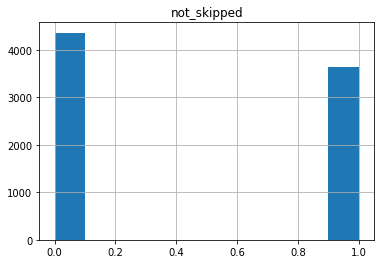

In [135]:
y_train.hist(column='not_skipped')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a675e2e90>]],
      dtype=object)

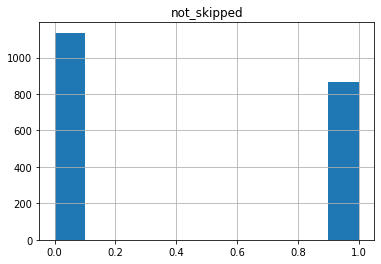

In [136]:
y_test.hist(column='not_skipped')

# Fit Model

In [114]:
# import keras_preprocessing as k
# import keras.layers as kl
# import keras.optimizers as ko
# import keras.callbacks as kc
# import keras.backend as K
# import keras.initializers as ki
# from keras.utils import Sequence
# from keras.models import Model
# from keras.models import Sequential

Using TensorFlow backend.


In [137]:
callbacks = [
    kc.EarlyStopping(monitor='val_loss',
                     patience=15,
                     verbose=1,
                     min_delta=1e-4,
                     mode='min',
                    restore_best_weights=True),
    kc.ReduceLROnPlateau(monitor='val_loss',
                         factor=0.1,
                         patience=4,
                         verbose=1,
                         epsilon=1e-4,
                         mode='min'),
    kc.ModelCheckpoint(monitor='val_loss',
                       filepath='model_weights_l{}.hdf5'.format(20),
                       save_best_only=True,
                       save_weights_only=True)
]

In [138]:
def buildModel():
    session = kl.Input(shape=(19,35), name ='session')
    prev_tracks = kl.Input(shape=(19,31), name ='prev_track')
    track=kl.Input(shape=(31,), name='track')
    prev_skips=kl.Input(shape=(19,1), name ='prev_skips')
    
# PREVIOUS SESSIONS INPUT     
    session1=kl.LSTM(128, activation='relu',kernel_initializer='random_uniform',
                bias_initializer=ki.constant(0.1),return_sequences=True)(session)
    session2=kl.Dropout(0.4)(session1)

    sessionLayers=kl.LSTM(128, activation='relu',kernel_initializer='random_uniform',
                bias_initializer=ki.constant(0.1),return_sequences=False)(session2)
    sessionLayers=kl.Dropout(0.4)(sessionLayers)
    
    
 # PREVIOUS TRACKS INPUT     
   
    session7=kl.LSTM(128, activation='relu',kernel_initializer='random_uniform',
                bias_initializer=ki.constant(0.1),return_sequences=True)(prev_tracks)
    session8=kl.Dropout(0.4)(session7)
  
    sessionLayers2=kl.LSTM(128, activation='relu',kernel_initializer='random_uniform',
                bias_initializer=ki.constant(0.1),return_sequences=False)(session8)
    sessionLayers2=kl.Dropout(0.4)(sessionLayers2)
    
 # TRACK TO PREDICT    

    trackLayer=kl.Dense(64, kernel_initializer='random_uniform',
                bias_initializer=ki.constant(0.1),activation='relu')(track)
    trackLayer=kl.Dropout(0.4)(trackLayer)
    trackLayer=kl.Dense(64, kernel_initializer='random_uniform',
                bias_initializer=ki.constant(0.1),activation='relu')(trackLayer)

# MERGE TRACK TO PREDICT WITH PREVIOUS TRACK INPUTS
    merge=kl.concatenate(
        [trackLayer,
            sessionLayers2
        ])
    merge=kl.Dropout(0.5)(merge)


# SEQUENCE OF PREVIOUS SKIPS    

    skip1=kl.LSTM(264, activation='relu',kernel_initializer='random_uniform',
                bias_initializer=ki.constant(0.1),return_sequences=True)(prev_skips)
    skip1=kl.Dropout(0.4)(skip1)
    skip1=kl.LSTM(264, activation='relu',kernel_initializer='random_uniform',
                bias_initializer=ki.constant(0.1),return_sequences=False)(skip1)
    skip1=kl.Dropout(0.4)(skip1)
    



# MERGE PREVIOUS SESSIONS AND SEQUENCE OF SKIPS


    merge2=kl.concatenate(
        [sessionLayers,
            skip1
        ])
    merge2=kl.Dropout(0.5)(merge2)
    
# MERGE ALL


    merge2=kl.concatenate(
        [merge2,
            merge
        ])

    merge2=kl.Dropout(0.4)(merge2)


    output=kl.Dense(2, activation='sigmoid')(merge2)
    
    model = Model(inputs = [session,prev_tracks,track, prev_skips], outputs=[output])
        
    model.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])
    return model

In [139]:
rnn=buildModel()

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [141]:
history=rnn.fit(
    [X_sess_train,X_prevtrack_train, X_track_train, x3_train], [Y_train], validation_data=([X_sess_test,X_prevtrack_test, X_track_test, x3_test], [Y_test]), batch_size=848,epochs=100, callbacks=callbacks,shuffle=False)


Train on 8000 samples, validate on 2000 samples
Epoch 1/100
8000/8000 [==============================] - 13s 2ms/step - loss: 0.6126 - accuracy: 0.6684 - val_loss: 0.5945 - val_accuracy: 0.6622
Epoch 2/100
8000/8000 [==============================] - 16s 2ms/step - loss: 0.6033 - accuracy: 0.6752 - val_loss: 0.5862 - val_accuracy: 0.6762
Epoch 3/100
8000/8000 [==============================] - 22s 3ms/step - loss: 0.5931 - accuracy: 0.6826 - val_loss: 0.5777 - val_accuracy: 0.6950
Epoch 4/100
8000/8000 [==============================] - 31s 4ms/step - loss: 0.5843 - accuracy: 0.6857 - val_loss: 0.5724 - val_accuracy: 0.6988
Epoch 5/100
8000/8000 [==============================] - 43s 5ms/step - loss: 0.5803 - accuracy: 0.6917 - val_loss: 0.5658 - val_accuracy: 0.6990
Epoch 6/100
8000/8000 [==============================] - 39s 5ms/step - loss: 0.5732 - accuracy: 0.6948 - val_loss: 0.5603 - val_accuracy: 0.7075
Epoch 7/100
8000/8000 [==============================] - 38s 5ms/step - loss


Epoch 00054: ReduceLROnPlateau reducing learning rate to 1.0000001111620805e-07.
Epoch 55/100
8000/8000 [==============================] - 27s 3ms/step - loss: 0.4973 - accuracy: 0.7634 - val_loss: 0.5293 - val_accuracy: 0.7415
Epoch 56/100
8000/8000 [==============================] - 28s 3ms/step - loss: 0.4988 - accuracy: 0.7623 - val_loss: 0.5293 - val_accuracy: 0.7415
Epoch 57/100
8000/8000 [==============================] - 27s 3ms/step - loss: 0.4967 - accuracy: 0.7634 - val_loss: 0.5293 - val_accuracy: 0.7415
Restoring model weights from the end of the best epoch
Epoch 00057: early stopping


In [142]:
from sklearn.metrics import classification_report,confusion_matrix
Y_pred = rnn.predict([X_sess_test,X_prevtrack_test, X_track_test, x3_test])
y_pred = np.array([np.argmax(pred) for pred in Y_pred])
print('  Classification Report:\n',classification_report(Y_test2,y_pred),'\n')

  Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.79      0.78      1136
           1       0.72      0.68      0.70       864

    accuracy                           0.75      2000
   macro avg       0.74      0.74      0.74      2000
weighted avg       0.74      0.75      0.74      2000
 



# Model Summaries

In [143]:
rnn.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
session (InputLayer)            (None, 19, 35)       0                                            
__________________________________________________________________________________________________
prev_skips (InputLayer)         (None, 19, 1)        0                                            
__________________________________________________________________________________________________
prev_track (InputLayer)         (None, 19, 31)       0                                            
__________________________________________________________________________________________________
lstm_1 (LSTM)                   (None, 19, 128)      83968       session[0][0]                    
____________________________________________________________________________________________

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy', 'lr'])


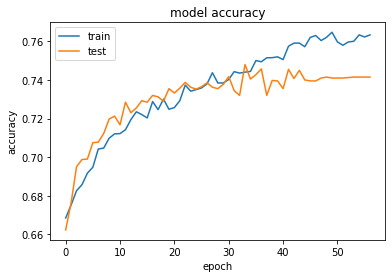

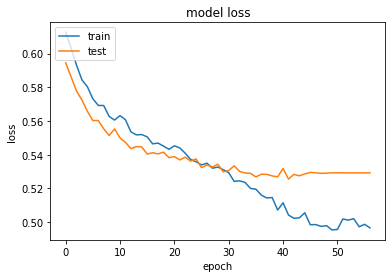

In [145]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

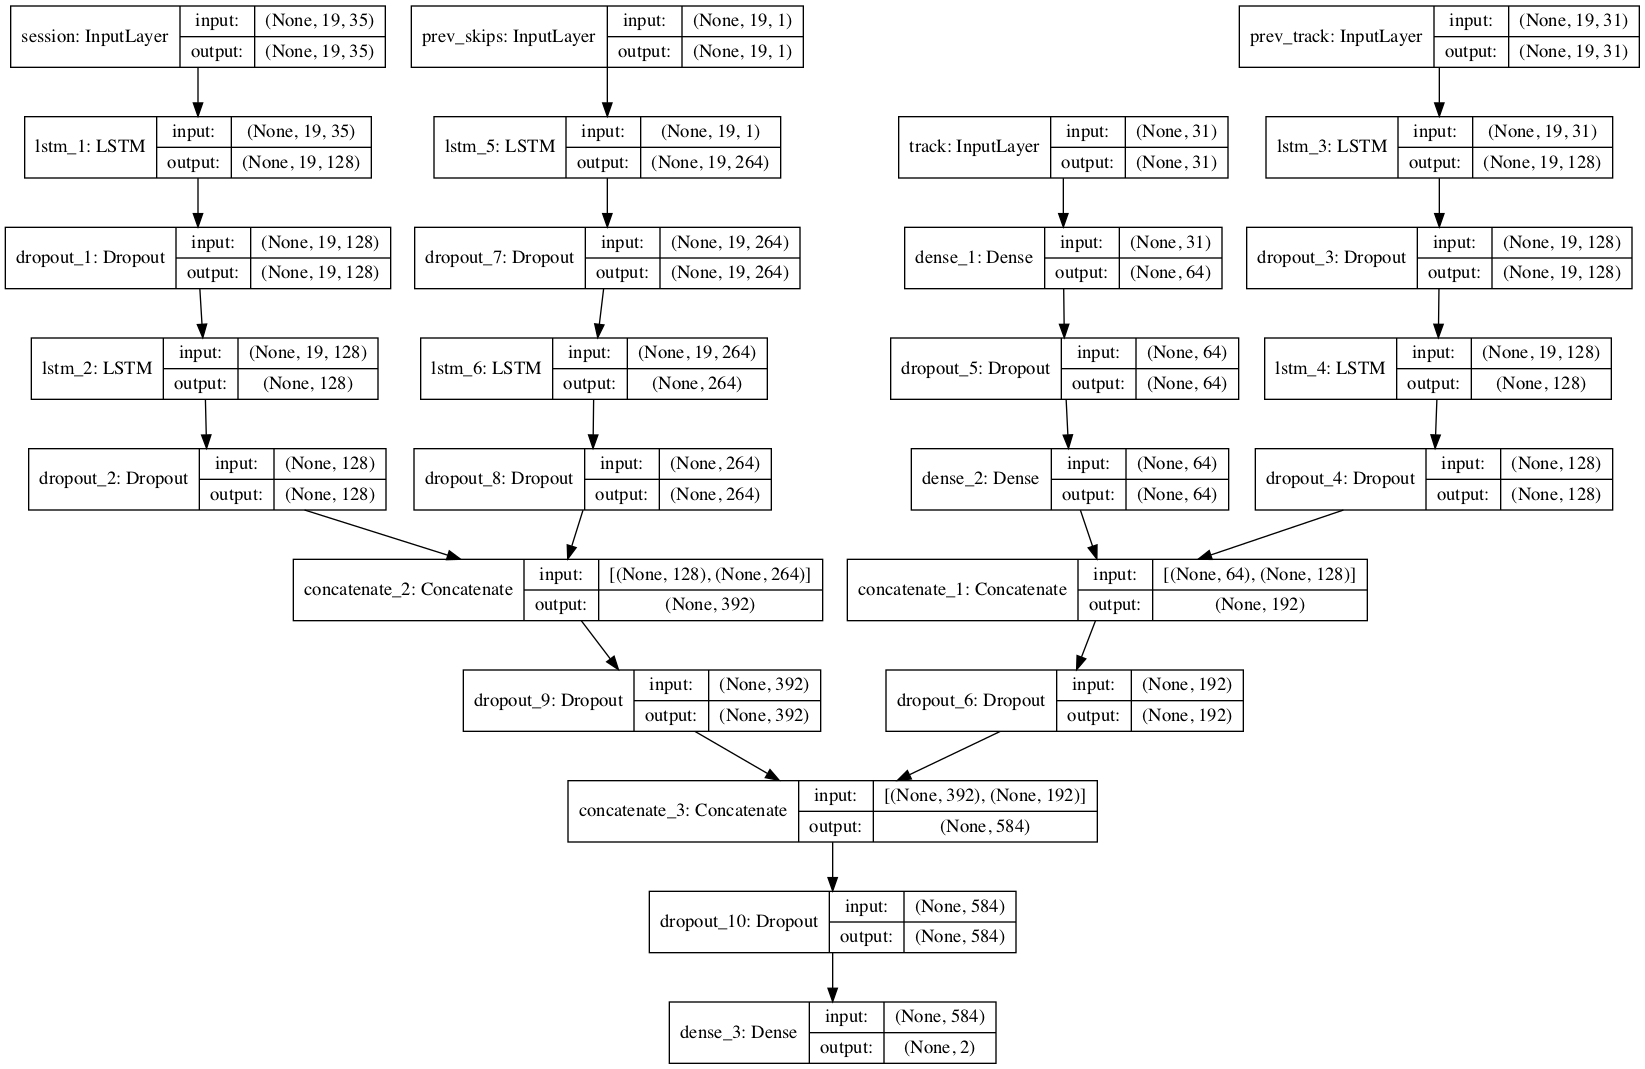

In [156]:
from keras.utils import plot_model

plot_model(rnn, to_file='C:\CSV\model5.png', show_layer_names=True, show_shapes=True)
